In [156]:
import matplotlib.pyplot as plt
import pandas as pd

In [157]:
dataset = pd.read_csv('../diabetes_dataset csv.csv') #creates a pandas dataframe from a CSV file of data

In [217]:
dataset.head(10) #shows the first 5 rows of the dataset

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
5,5,40,Female,Asian,33.6,96.1,75.0,13.5,170,90,...,44.5,190.0,77.5,6.4,Low,3460,NaN,Never,1,1
6,6,58,Male,Black,33.2,100.0,97.7,13.3,131,80,...,77.9,73.4,52.1,4.7,High,3107,Moderate,Never,0,0
7,7,38,Female,Hispanic,26.9,105.0,80.2,10.9,121,83,...,69.7,122.2,72.0,5.6,Moderate,2390,Heavy,Current,0,1
8,8,42,Male,White,27.0,115.4,83.9,7.0,132,118,...,73.2,97.4,76.4,6.2,Low,3844,NaN,Former,1,0
9,9,30,Male,White,24.0,74.6,72.0,14.0,146,83,...,53.3,170.7,14.5,6.9,High,2230,Moderate,Former,1,0


## **HISTOGRAM**

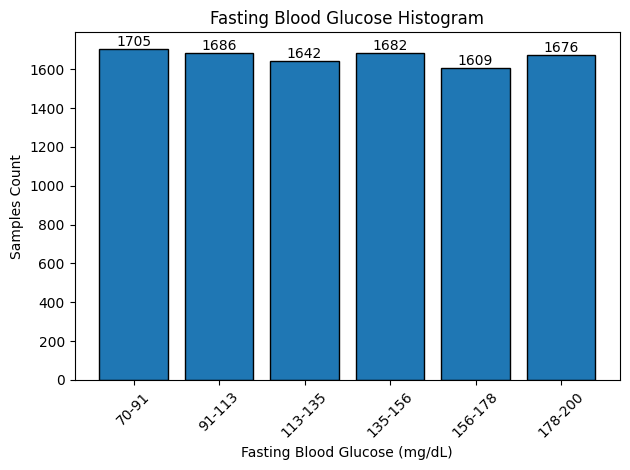

In [158]:
fig1 = plt.figure(1) #Need to make a figure 'object', that we will then manipulate
ax = fig1.add_subplot(1,1,1) #row, col, index - Here we add only 1 row, 1 column, for a single plot in this figure
counts, bins, patches = ax.hist(dataset['Fasting_Blood_Glucose'], bins=6, rwidth=0.8, edgecolor = 'black') #This creates the histogram. The bins parameter determines the number of bars you will see
ax.set_title('Fasting Blood Glucose Histogram')
ax.set_xlabel('Fasting Blood Glucose (mg/dL)') # X axis
ax.set_ylabel('Samples Count') # Y axis

# Set x-axis tick labels to show bin ranges
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=(bins[:-1] + bins[1:]) / 2, labels=bin_labels, rotation=45)

# Adds labels of sample count
plt.bar_label(patches, fontsize=10, color='black')
#adjust the layout
plt.tight_layout()


## **BOXPLOT**

Text(0.5, 1.0, 'Fasting Blood Glucose Box Plot')

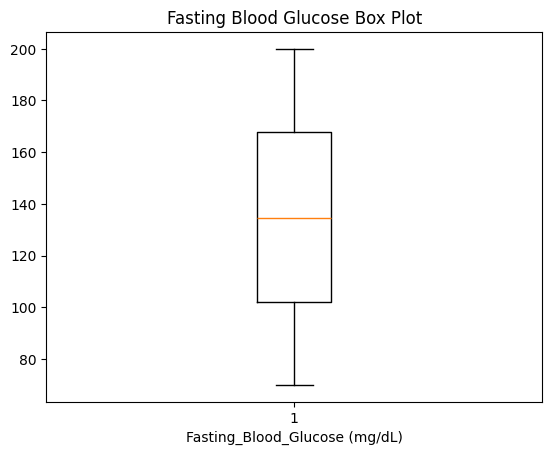

In [177]:
#Notice that this next figure object is created with the argument '2'. This allows us to display multiple figures in one run
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(1,1,1)
ax2.boxplot(dataset['Fasting_Blood_Glucose'])
ax2.set_xlabel('Fasting_Blood_Glucose (mg/dL)')
ax2.set_title('Fasting Blood Glucose Box Plot')



## **BAR CHART USING THE .GROUPBY() FUNCTION**

Ethnicity
Asian       136.011027
Black       135.109807
Hispanic    133.887561
White       134.076189
Name: Fasting_Blood_Glucose, dtype: float64


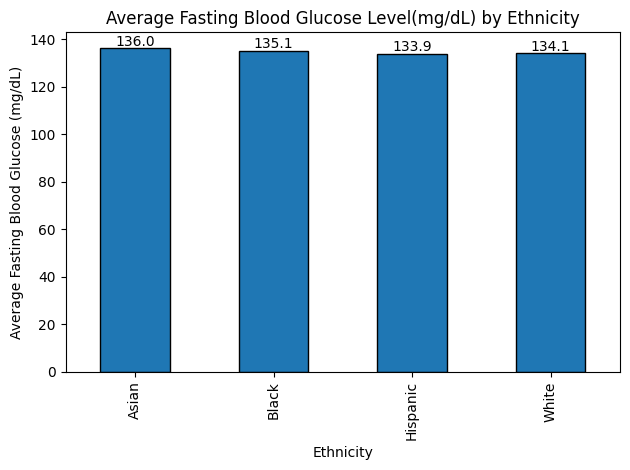

In [178]:
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1,1,1)

#This next line creates a pandas Series object. A Series is a pandas dataframe with just one column.
#The .groupby() portion creates a factor from the 'Ethnicity' column. The .Fasting_Blood_Glucose.mean() calculates the mean of the Fasting Blood Glucose.
#The resulting Series lists two groups: Asian, Black, Hispanic, and White, and identifies the average Fasting Blood Glucose of each group.
var = dataset.groupby('Ethnicity').Fasting_Blood_Glucose.mean()
print(var)

ax3.set_ylabel('Average Fasting Blood Glucose (mg/dL)')
ax3.set_title("Average Fasting Blood Glucose Level(mg/dL) by Ethnicity")
var.plot(kind='bar', edgecolor = 'black')

#adjust the layout
plt.tight_layout()

for i, value in enumerate(var.values):
    ax3.text(i, value + 1, f'{value:.1f}', ha='center', fontsize=10)

# **SCATTER CHART & BUBBLE CHART DISPLAYED IN ONE FIGURE **

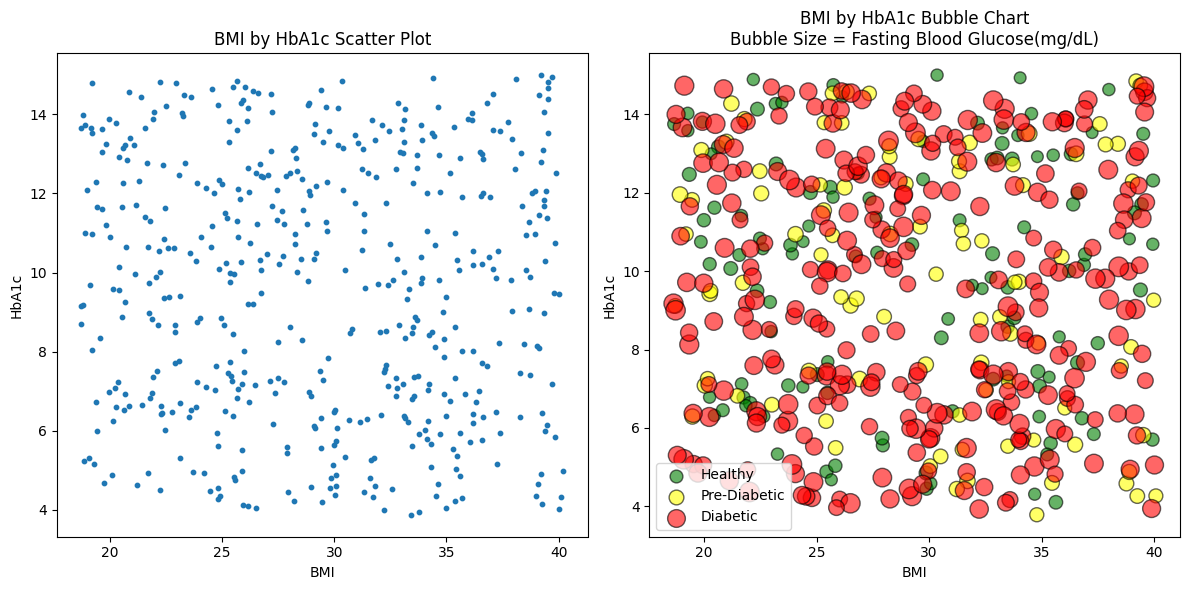

In [213]:
#This next figure contains two subplots, using one row and two columns. The 'figsize' parameter makes extra space for both.
fig4 = plt.figure(4, figsize=(12,6))

#sampling to avoid overplotting
sampled_data = dataset.sample(n=500)

#filter those who are considered pre-diabetic and Diabetic
pre_filtered = sampled_data[(sampled_data['Fasting_Blood_Glucose'] >= 100) & (sampled_data['Fasting_Blood_Glucose'] <= 125)]
diabetic_filtered = sampled_data[sampled_data['Fasting_Blood_Glucose'] >=126 ]
healthy = sampled_data[sampled_data['Fasting_Blood_Glucose'] < 100]

#The next line is the first subplot: 1 row, 2 columns, index 1 meaning that this is the first subplot
ax4 = fig4.add_subplot(1,2,1)

#plot and add jitter to normal scatter plot
ax4.scatter(sampled_data['BMI'] + np.random.normal(0, 0.1,len(sampled_data)),sampled_data['HbA1c'] + np.random.normal (0, 0.1, len(sampled_data)), s=10)

#label graph
ax4.set_title('BMI by HbA1c Scatter Plot')
ax4.set_xlabel('BMI')
ax4.set_ylabel('HbA1c')


#Notice the numbers. This is STILL fig4, so the same figure, but now we add an additional subplot.
ax5 = fig4.add_subplot(1,2,2) # Second subplot: 1 row, 2 columns, index 2 for the second subplot

#Add jitter, transperancy, and edgecolors to the bubbles to all three groups, plot healthy first
ax5.scatter(healthy['BMI'] + np.random.normal(0, 0.1,len(healthy)),healthy['HbA1c'] + np.random.normal (0, 0.1, len(healthy)), s=healthy['Fasting_Blood_Glucose'], edgecolors='black', alpha = 0.6, color = 'green', label = "Healthy")

# Add the pre-diabetic group to study
ax5.scatter(pre_filtered['BMI']+ np.random.normal(0, 0.1,len(pre_filtered)),pre_filtered['HbA1c']+ np.random.normal(0, 0.1,len(pre_filtered)), color = 'yellow', s=pre_filtered['Fasting_Blood_Glucose'], edgecolors='black', alpha = 0.6, label='Pre-Diabetic')

#add the diabetic group to study
ax5.scatter(diabetic_filtered['BMI']+ np.random.normal(0, 0.1,len(diabetic_filtered)),diabetic_filtered['HbA1c']+ np.random.normal(0, 0.1,len(diabetic_filtered)), color = 'Red', s=diabetic_filtered['Fasting_Blood_Glucose'], edgecolors='black', alpha = 0.6, label='Diabetic')

#label graph
ax5.set_title('BMI by HbA1c Bubble Chart\nBubble Size = Fasting Blood Glucose(mg/dL)')
ax5.set_xlabel('BMI')
ax5.set_ylabel('HbA1c')
plt.legend()

plt.tight_layout()

## **pie chart with ONE slice which 'explodes**

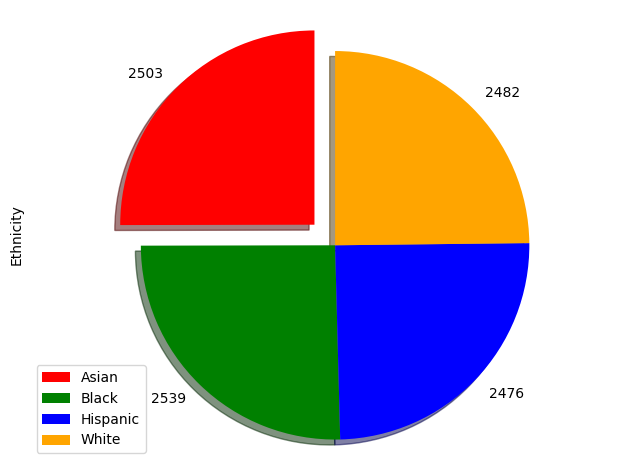

In [215]:
fig5 = plt.figure(5)
ax6 = fig5.add_subplot(1,1,1)
var = dataset.groupby(['Ethnicity']).Ethnicity.count() #Make a Series object for this pie chart

# The 'explode' argument should have the same length as the number of slices in the pie chart.
# Since 'var' has 4 categories, 'explode' should have 4 values.
var.plot.pie(y=var.index, labels=list(var), shadow=True, colors=['red','green','blue', 'orange'], explode=(0.15, 0, 0, 0), startangle=90)

#The 'keys' in the next line are the row headings of the Series object
plt.legend(var.keys())
plt.axis('equal')
plt.tight_layout()

plt.show()